In [9]:
# set up
import pandas as pd
import numpy as np
import pickle
import time 
import os
import matplotlib.pyplot as plt
import datetime
from operator import itemgetter
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from pylab import *
from matplotlib.font_manager import FontProperties  
data_folder_path = 'C:\\Users\\goodluck\\Desktop\\DB'
raw_data_path =  "C:\\Users\\goodluck\\Desktop\\DB\\raw_data"
storage_path =  "C:\\Users\\goodluck\\Desktop\\DB\\database_storage"
DTBS_path = os.path.join(storage_path, "DTBS.pkl")
font = FontProperties(fname=r"simsun.ttf", size=14)  
matplotlib.rcParams['axes.unicode_minus'] =False
mpl.rcParams['font.sans-serif'] = ['SimHei']
tick_spacing = 4

# re-open
with open(DTBS_path, 'rb') as f:  
    DTBS = pickle.load(f)

In [2]:
# 获取日期
def select_days(s_d, e_d, wkd, gap):
    days = []
    flag = 0
    sdt = datetime.datetime.strptime(s_d, '%Y-%m-%d').date()
    edt = datetime.datetime.strptime(e_d, '%Y-%m-%d').date()
    for day in DTBS['D']['day']:
        cdt =  datetime.datetime.strptime(day, '%Y-%m-%d').date()
        if cdt >= sdt:
            flag = 1
        
        if cdt == edt:
            days.append(day)
            break
        
        if cdt > edt:
            break 
            
        if flag == 1:
            days.append(day)
            
    s_days = []
    count = 0
    for day in days:
        if day in DTBS['D'][wkd]:
            if count % gap == 0:
                s_days.append(day)
                
            count += 1
    
    
    return s_days

f20wm = select_days('2020-01-01', '2020-06-30', 'mon', 1)
f20fm = select_days('2020-01-01', '2020-06-30', 'mon', 2)
f20mm = select_days('2020-01-01', '2020-06-30', 'mon', 4)
s20wm = select_days('2020-07-01', '2020-12-31', 'mon', 1)
s20fm = select_days('2020-07-01', '2020-12-31', 'mon', 2)
s20mm = select_days('2020-07-01', '2020-12-31', 'mon', 4)
f21wm = select_days('2021-01-01', '2021-06-30', 'mon', 1)
f21fm = select_days('2021-01-01', '2021-06-30', 'mon', 2)
f21mm = select_days('2021-01-01', '2021-06-30', 'mon', 4)
s21wm = select_days('2021-07-01', '2021-12-31', 'mon', 1)
s21fm = select_days('2021-07-01', '2021-12-31', 'mon', 2)
s21mm = select_days('2021-07-01', '2021-12-31', 'mon', 4)
f22wm = select_days('2022-01-01', '2022-06-30', 'mon', 1)
f22fm = select_days('2022-01-01', '2022-06-30', 'mon', 2)
f22mm = select_days('2022-01-01', '2022-06-30', 'mon', 4)
s22wm = select_days('2022-07-01', '2022-12-31', 'mon', 1)
s22fm = select_days('2022-07-01', '2022-12-31', 'mon', 2)
s22mm = select_days('2022-07-01', '2022-12-31', 'mon', 4)
f23wm = select_days('2023-01-01', '2023-03-29', 'mon', 1)
f23fm = select_days('2023-01-01', '2023-03-29', 'mon', 2)
f23mm = select_days('2023-01-01', '2023-03-29', 'mon', 4)
f23mm.append('2023-04-10')
a20wm = select_days('2020-01-01', '2020-12-31', 'mon', 1)
a20fm = select_days('2020-01-01', '2020-12-31', 'mon', 2)
a20mm = select_days('2020-01-01', '2020-12-31', 'mon', 4)
a21wm = select_days('2021-01-01', '2021-12-31', 'mon', 1)
a21fm = select_days('2021-01-01', '2021-12-31', 'mon', 2)
a21mm = select_days('2021-01-01', '2021-12-31', 'mon', 4)
a22wm = select_days('2022-01-01', '2022-12-31', 'mon', 1)
a22fm = select_days('2022-01-01', '2022-12-31', 'mon', 2)
a22mm = select_days('2022-01-01', '2022-12-31', 'mon', 4)

a22wm = select_days('2022-01-01', '2022-12-31', 'mon', 1)
a22wt = select_days('2022-01-01', '2022-12-31', 'tue', 1)
a22ww = select_days('2022-01-01', '2022-12-31', 'wed', 1)
a22wh = select_days('2022-01-01', '2022-12-31', 'thu', 1)
a22wf = select_days('2022-01-01', '2022-12-31', 'fri', 1)



index_year = [f20wm, s20wm, f21wm, s21wm, f22wm, s22wm, f23wm]
hyfm = [f20fm, s20fm, f21fm, s21fm, f22fm, s22fm, f23fm]
hymm = [f20mm, s20mm, f21mm, s21mm, f22mm, s22mm, f23mm]

# takeSecond
def takeSecond(elem):
    return elem[1]

# select_existing
def select_existing(dt):
    exist = []
    for code in DTBS['A'].keys():
        if DTBS['A'][code][dt]['ia'] == 1:
            exist.append(code)
            
    return exist

In [4]:


def get_rate(s_d, e_d, CB):
    rate = []
    start_num = DTBS['D']['day'].index(s_d)
    end_num = DTBS['D']['day'].index(e_d)
    for i in range(start_num, end_num):
        date_next = DTBS['D']['day'][i+1]
        date = DTBS['D']['day'][i]
        rate_ = DTBS['A'][CB][date_next]['dp']/DTBS['A'][CB][date]['dp'] - 1
        rate.append(rate_)
    return(rate)

def Get_Sharpe_Ratio(rate, rf=0.028397):
    avg_rate = np.mean(rate)
    std_rate = np.std(rate)
    Sharpe_Ratio = (avg_rate * np.sqrt(252)-rf) / std_rate
    return(Sharpe_Ratio)
    


In [5]:
end_date = "2023-04-14"
num = DTBS['D']['day'].index(end_date)
start_date = DTBS['D']['day'][num-7]
CB_pool1 = select_existing(start_date)
CB_pool2 = select_existing(end_date)
CB_pool =list(set(CB_pool1).intersection(set(CB_pool2)))
print(len(CB_pool))
Sharpe_Ratio = []
for CB in CB_pool:
    rate = get_rate(start_date, end_date, CB)
    Sharpe_Ratio_ = Get_Sharpe_Ratio(rate)
    Sharpe_Ratio.append((CB,Sharpe_Ratio_))
Sharpe_Ratio

476


[('110090.SH', -1.6206682924525135),
 ('127036.SZ', 1.5195990612251944),
 ('113615.SH', 8.720872890969614),
 ('113054.SH', -2.9891912791543116),
 ('123143.SZ', -11.383559257577705),
 ('113608.SH', -5.698121024939313),
 ('123056.SZ', 3.0103723267984677),
 ('113542.SH', -9.629842935274104),
 ('128035.SZ', 0.5034645367053069),
 ('110087.SH', -1.966753286443541),
 ('128076.SZ', -5.642866632485761),
 ('113537.SH', -9.34156625673755),
 ('118030.SH', 4.709880417633371),
 ('123082.SZ', -0.9984490732399062),
 ('118022.SH', -0.6957299023627811),
 ('113057.SH', -5.6089105085357005),
 ('127053.SZ', 5.769309238224194),
 ('113656.SH', -8.64031167587084),
 ('123103.SZ', -7.594887735109673),
 ('118008.SH', -10.958558871966801),
 ('110043.SH', -9.706309482113387),
 ('128123.SZ', -9.030421678835678),
 ('113563.SH', -6.259610849238319),
 ('128062.SZ', -27.48706319922448),
 ('127017.SZ', -9.20512737520182),
 ('123011.SZ', -24.150330572627002),
 ('123142.SZ', -14.142637539367653),
 ('128053.SZ', -11.966782

In [6]:
Sharpe_Ratio.sort(key=takeSecond,reverse=True)
print(Sharpe_Ratio)
low = Sharpe_Ratio[0:10]
CB_pool = [i[0] for i in low]
CB_pool

[('110057.SH', 16.97571460284672), ('123025.SZ', 14.038802697887233), ('123046.SZ', 12.520517260343295), ('128132.SZ', 12.212285749459573), ('127058.SZ', 11.584140862989848), ('123109.SZ', 11.292370616271244), ('127018.SZ', 11.025867862051795), ('123176.SZ', 10.790594026238292), ('110061.SH', 9.86982889351165), ('113561.SH', 9.184400265603033), ('127051.SZ', 8.784527136579317), ('127070.SZ', 8.75224855809951), ('113615.SH', 8.720872890969614), ('123167.SZ', 8.62599161931236), ('110074.SH', 8.5447555574007), ('110048.SH', 7.728838563062478), ('127073.SZ', 7.493724407002506), ('110060.SH', 6.772231470589426), ('123108.SZ', 6.6744101797132105), ('127020.SZ', 6.4106455798781825), ('127052.SZ', 6.253154173999378), ('123119.SZ', 6.0788390026403984), ('113664.SH', 6.031975123517362), ('127029.SZ', 5.9495800625222115), ('118012.SH', 5.878267533377052), ('123122.SZ', 5.836222512258823), ('127053.SZ', 5.769309238224194), ('113039.SH', 5.59147150774546), ('113024.SH', 5.525060904864567), ('123112

['110057.SH',
 '123025.SZ',
 '123046.SZ',
 '128132.SZ',
 '127058.SZ',
 '123109.SZ',
 '127018.SZ',
 '123176.SZ',
 '110061.SH',
 '113561.SH']

In [7]:
# 回测
def Get_CB_pool(end_date, start_date, num):
    index = DTBS['D']['mon'].index(end_date)
    end_date_next = DTBS['D']['mon'][index+1]
    CB_pool1 = select_existing(start_date)
    CB_pool2 = select_existing(end_date_next)
    CB_pool =list(set(CB_pool1).intersection(set(CB_pool2)))
    Sharpe_Ratio = []
    for CB in CB_pool:
        rate = get_rate(start_date, end_date, CB)
        Sharpe_Ratio_ = Get_Sharpe_Ratio(rate)
        Sharpe_Ratio.append((CB,Sharpe_Ratio_))
    Sharpe_Ratio.sort(key=takeSecond,reverse=True)

    low = Sharpe_Ratio[0:num]
    CB_pool = [i[0] for i in low]
    return(CB_pool)

2020-01-06 ['128053.SZ', '127011.SZ', '113024.SH', '123010.SZ', '113020.SH']
2020-01-13 ['128044.SZ', '113522.SH', '128052.SZ', '123029.SZ', '113550.SH']
2020-01-20 ['123029.SZ', '123016.SZ', '128061.SZ', '123003.SZ', '113538.SH']
2020-02-03 ['113555.SH', '128053.SZ', '113538.SH', '127004.SZ', '123029.SZ']
2020-02-10 ['127004.SZ', '113510.SH', '128080.SZ', '128053.SZ', '128028.SZ']
2020-02-17 ['128063.SZ', '128019.SZ', '113548.SH', '113504.SH', '110062.SH']
2020-02-24 ['113514.SH', '128070.SZ', '128057.SZ', '123037.SZ', '113539.SH']
2020-03-02 ['123029.SZ', '123002.SZ', '128053.SZ', '128030.SZ', '113510.SH']
2020-03-09 ['113510.SH', '128053.SZ', '113555.SH', '123029.SZ', '113559.SH']
2020-03-16 ['123037.SZ', '128091.SZ', '113555.SH', '123034.SZ', '128041.SZ']
2020-03-23 ['128073.SZ', '128040.SZ', '113535.SH', '123031.SZ', '123014.SZ']
2020-03-30 ['110057.SH', '123029.SZ', '123020.SZ', '128097.SZ', '113565.SH']
2020-04-13 ['123029.SZ', '128045.SZ', '123041.SZ', '110034.SH', '128098.SZ']

C:\Users\goodluck\AppData\Local\Temp\ipykernel_6580\3964077831.py:27: RuntimeWarning: divide by zero encountered in double_scalars
  Sharpe_Ratio = (avg_rate * np.sqrt(252)-0.028397) / std_rate


<Figure size 640x480 with 0 Axes>

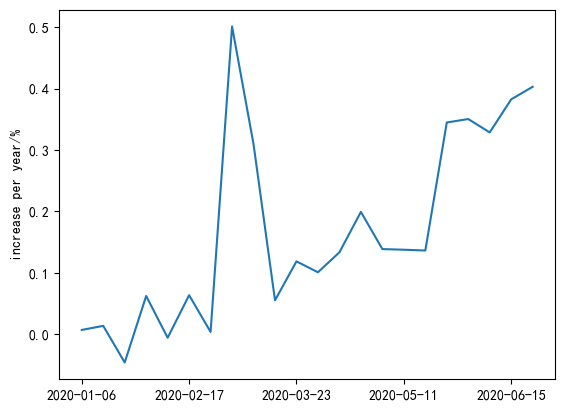

2020-07-06 ['110066.SH', '110034.SH', '113582.SH', '113035.SH', '128106.SZ']
2020-07-13 ['113575.SH', '123036.SZ', '123053.SZ', '123049.SZ', '128090.SZ']
2020-07-20 ['113526.SH', '128103.SZ', '128089.SZ', '123015.SZ', '128017.SZ']
2020-07-27 ['128115.SZ', '113559.SH', '113565.SH', '127017.SZ', '113575.SH']
2020-08-03 ['113527.SH', '128114.SZ', '127011.SZ', '128115.SZ', '123046.SZ']
2020-08-10 ['113527.SH', '113582.SH', '128043.SZ', '128097.SZ', '128103.SZ']
2020-08-17 ['113033.SH', '123013.SZ', '128052.SZ', '113550.SH', '113553.SH']
2020-08-24 ['113571.SH', '113033.SH', '123044.SZ', '128017.SZ', '128067.SZ']
2020-08-31 ['128104.SZ', '110069.SH', '113509.SH', '127003.SZ', '123027.SZ']
2020-09-07 ['123027.SZ', '113580.SH', '113586.SH', '113571.SH', '113576.SH']
2020-09-14 ['128071.SZ', '123035.SZ', '113521.SH', '123002.SZ', '110065.SH']
2020-09-21 ['127004.SZ', '128126.SZ', '113582.SH', '113580.SH', '123015.SZ']
2020-09-28 ['128056.SZ', '123029.SZ', '113582.SH', '123018.SZ', '110067.SH']

<Figure size 640x480 with 0 Axes>

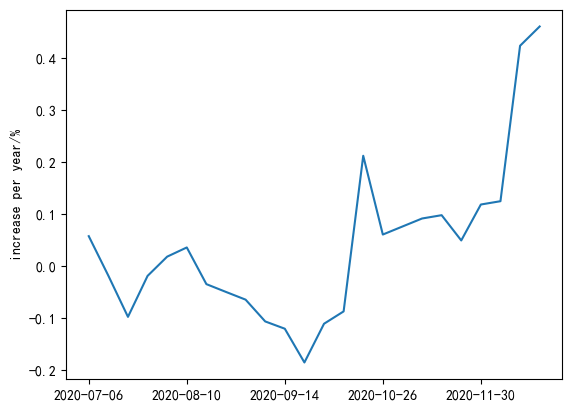

2021-01-04 ['113582.SH', '113575.SH', '123025.SZ', '110069.SH', '128115.SZ']
2021-01-11 ['113508.SH', '128046.SZ', '113012.SH', '128028.SZ', '128126.SZ']
2021-01-18 ['123066.SZ', '128125.SZ', '128032.SZ', '123025.SZ', '113577.SH']
2021-01-25 ['113545.SH', '113550.SH', '113605.SH', '128010.SZ', '113598.SH']
2021-02-01 ['128030.SZ', '113592.SH', '113543.SH', '123091.SZ', '123055.SZ']
2021-02-08 ['128030.SZ', '113543.SH', '128029.SZ', '113592.SH', '113508.SH']
2021-02-22 ['110070.SH', '123028.SZ', '128049.SZ', '127022.SZ', '113034.SH']
2021-03-01 ['128143.SZ', '127018.SZ', '110069.SH', '128013.SZ', '113594.SH']
2021-03-08 ['113526.SH', '128100.SZ', '123068.SZ', '110048.SH', '110058.SH']
2021-03-15 ['113526.SH', '113563.SH', '113561.SH', '128022.SZ', '113548.SH']
2021-03-22 ['113568.SH', '123076.SZ', '123080.SZ', '113596.SH', '123039.SZ']
2021-03-29 ['113588.SH', '128097.SZ', '123078.SZ', '123018.SZ', '123092.SZ']
2021-04-12 ['113589.SH', '127019.SZ', '123028.SZ', '127018.SZ', '110070.SH']

<Figure size 640x480 with 0 Axes>

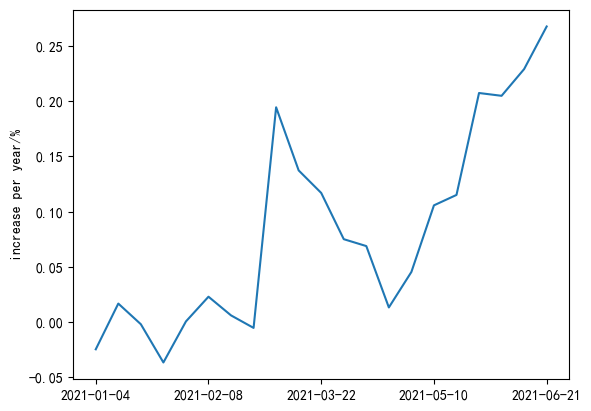

2021-07-05 ['113516.SH', '128111.SZ', '123110.SZ', '123007.SZ', '128032.SZ']
2021-07-12 ['110074.SH', '113600.SH', '123070.SZ', '128111.SZ', '123069.SZ']
2021-07-19 ['128133.SZ', '110048.SH', '123079.SZ', '128072.SZ', '113014.SH']
2021-07-26 ['123084.SZ', '123067.SZ', '113572.SH', '123085.SZ', '128072.SZ']
2021-08-02 ['123031.SZ', '128093.SZ', '113621.SH', '123051.SZ', '113025.SH']
2021-08-09 ['123024.SZ', '123084.SZ', '113026.SH', '113570.SH', '113565.SH']
2021-08-16 ['128014.SZ', '110070.SH', '111000.SH', '123034.SZ', '127027.SZ']
2021-08-23 ['128062.SZ', '123060.SZ', '127005.SZ', '123103.SZ', '113027.SH']
2021-08-30 ['113536.SH', '127030.SZ', '123102.SZ', '127020.SZ', '128109.SZ']
2021-09-06 ['113525.SH', '110072.SH', '128062.SZ', '127028.SZ', '110048.SH']
2021-09-13 ['128139.SZ', '113525.SH', '123049.SZ', '113569.SH', '113030.SH']
2021-09-27 ['123083.SZ', '123107.SZ', '123089.SZ', '127045.SZ', '128106.SZ']
2021-10-11 ['113601.SH', '127045.SZ', '127015.SZ', '113027.SH', '123107.SZ']

<Figure size 640x480 with 0 Axes>

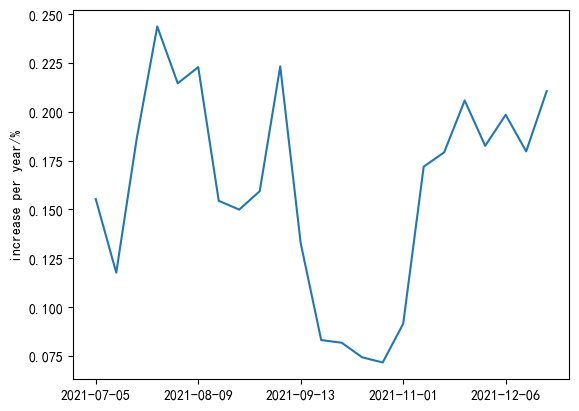

2022-01-10 ['128074.SZ', '128105.SZ', '127049.SZ', '128037.SZ', '128129.SZ']
2022-01-17 ['113588.SH', '110074.SH', '128108.SZ', '127007.SZ', '113577.SH']
2022-01-24 ['123131.SZ', '128044.SZ', '110081.SH', '128078.SZ', '123077.SZ']
2022-02-07 ['128017.SZ', '123071.SZ', '123013.SZ', '123114.SZ', '123109.SZ']
2022-02-14 ['127042.SZ', '110064.SH', '128037.SZ', '128022.SZ', '128046.SZ']
2022-02-21 ['128111.SZ', '113036.SH', '113548.SH', '128040.SZ', '113597.SH']
2022-02-28 ['123044.SZ', '123014.SZ', '113048.SH', '123128.SZ', '123070.SZ']
2022-03-07 ['128106.SZ', '123018.SZ', '128087.SZ', '113575.SH', '123134.SZ']
2022-03-14 ['123064.SZ', '113618.SH', '113601.SH', '123073.SZ', '123121.SZ']
2022-03-21 ['127033.SZ', '110064.SH', '123073.SZ', '123080.SZ', '110057.SH']
2022-03-28 ['113585.SH', '127007.SZ', '128030.SZ', '113618.SH', '113620.SH']
2022-04-11 ['123063.SZ', '128125.SZ', '127039.SZ', '128123.SZ', '110060.SH']
2022-04-18 ['127043.SZ', '128082.SZ', '123135.SZ', '123031.SZ', '113620.SH']

<Figure size 640x480 with 0 Axes>

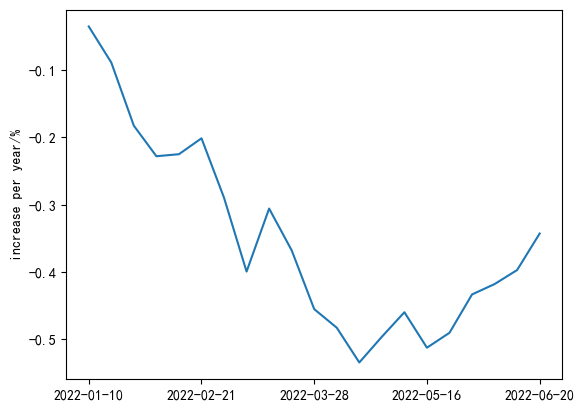

2022-07-04 ['127029.SZ', '123119.SZ', '113625.SH', '128017.SZ', '123101.SZ']
2022-07-11 ['113648.SH', '113620.SH', '127045.SZ', '128106.SZ', '123107.SZ']
2022-07-18 ['123083.SZ', '123067.SZ', '128139.SZ', '113505.SH', '118001.SH']
2022-07-25 ['123065.SZ', '113566.SH', '113025.SH', '127058.SZ', '113577.SH']
2022-08-01 ['123057.SZ', '128141.SZ', '128109.SZ', '128118.SZ', '113025.SH']
2022-08-08 ['123123.SZ', '123142.SZ', '123060.SZ', '127064.SZ', '113621.SH']
2022-08-15 ['128017.SZ', '123023.SZ', '127027.SZ', '113615.SH', '128046.SZ']
2022-08-22 ['123023.SZ', '110085.SH', '123148.SZ', '113631.SH', '123107.SZ']
2022-08-29 ['127014.SZ', '128085.SZ', '110052.SH', '123135.SZ', '128062.SZ']
2022-09-05 ['123132.SZ', '123143.SZ', '128134.SZ', '110067.SH', '113058.SH']
2022-09-19 ['128121.SZ', '123143.SZ', '123013.SZ', '123140.SZ', '123080.SZ']
2022-09-26 ['123057.SZ', '111000.SH', '127030.SZ', '113646.SH', '123067.SZ']
2022-10-10 ['110038.SH', '110052.SH', '123132.SZ', '123110.SZ', '128030.SZ']

<Figure size 640x480 with 0 Axes>

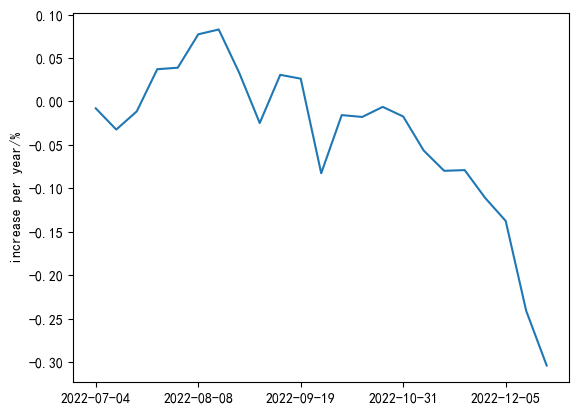

2023-01-09 ['128140.SZ', '123158.SZ', '113653.SH', '113546.SH', '127065.SZ']
2023-01-16 ['128023.SZ', '123154.SZ', '123107.SZ', '113655.SH', '118015.SH']
2023-01-30 ['127035.SZ', '113046.SH', '118005.SH', '113610.SH', '123022.SZ']
2023-02-06 ['127071.SZ', '128036.SZ', '123031.SZ', '113597.SH', '123116.SZ']
2023-02-13 ['128030.SZ', '123105.SZ', '111005.SH', '123031.SZ', '123098.SZ']
2023-02-20 ['110055.SH', '128030.SZ', '113609.SH', '128114.SZ', '113622.SH']
2023-02-27 ['127043.SZ', '110045.SH', '113593.SH', '127018.SZ', '128025.SZ']
2023-03-06 ['118012.SH', '123131.SZ', '123046.SZ', '110062.SH', '110048.SH']
2023-03-13 ['113588.SH', '123052.SZ', '123140.SZ', '128127.SZ', '128041.SZ']
2023-03-20 ['113588.SH', '123031.SZ', '127014.SZ', '123116.SZ', '128132.SZ']
收益最好的一周： 2023-02-27 0.03251310879892169
收益最差的一周： 2023-03-06 -0.024155239605895863
胜率： 0.5
cumulative_profit: 0.03696078796896187


<Figure size 640x480 with 0 Axes>

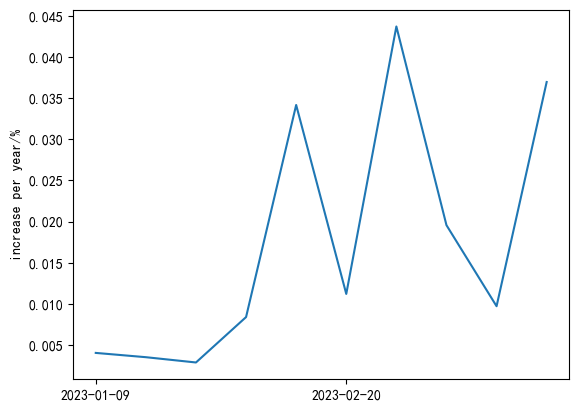

In [8]:
#单利周收益
   
for j in range(len(index_year)):
    days = index_year[j]
    profit = []
    cumulative_profit = []

    for i in range(len(days)-1):
        
        date = index_year[j][i]
        date_next = index_year[j][i+1]

        #-------------------------------------------------------------------------------------------------------------------
        #选股
        end_date = date
        index = DTBS['D']['day'].index(end_date)
        start_date = DTBS['D']['day'][index-7]
        
        CB_pool = Get_CB_pool(end_date, start_date, 5)
        
        print(date,CB_pool)
        #-------------------------------------------------------------------------------------------------------------------

        if len(CB_pool) == 0:
            profit.append(0)
        else:
            cost_per = 0
            profit_per = 0
            for CB in CB_pool:
                profit_per +=  DTBS['A'][CB][date_next]['dp'] - DTBS['A'][CB][date]['dp']
                cost_per += DTBS['A'][CB][date]['dp']
            profit.append(profit_per/cost_per)
        
        cumulative_profit.append(sum(profit))

    
    #输出最大最小值
#     print(profit,cumulative_profit)
    max_index = profit.index(max(profit))
    min_index = profit.index(min(profit))
    print('收益最好的一周：',index_year[j][max_index],max(profit))
    print('收益最差的一周：',index_year[j][min_index],min(profit))
    
    #输出胜率
    a = 0
    for profit_ in profit:
        if profit_ >= 0:
            a += 1
    print('胜率：',a/len(profit))
    
    #输出累计收益
    print("cumulative_profit:",cumulative_profit[-1])

    
    #可视化
    plt.figure()
    x = index_year[j][0:-1]
#    print(x,len(x),type(x))

    tick_spacing = 5
    fig, ax = plt.subplots(1,1)
    plt.plot(x,cumulative_profit)

    ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
    plt.ylabel('increase per year/%')
    plt.show()
